In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import beta

In [2]:
df = pd.read_csv("user_event_data.csv")

In [3]:
# unique users per group
total_users_per_group = df.groupby("group")["user_id"].nunique()
total_users_per_group

group
A    1000
B    1000
Name: user_id, dtype: int64

In [4]:
# users who reached payment screen per group
users_reached_payment_per_group = (
    df[df["event"] == "user_reached_payment_screen"]
    .groupby("group")["user_id"]
    .nunique()
)
users_reached_payment_per_group

group
A    831
B    859
Name: user_id, dtype: int64

In [5]:
# action distribution, excluding onboarding events
excluded_event = ["user_started_onboarding"]

action_distribution_A = (
    df[(df["group"] == "A") & (~df["event"].isin(excluded_event))]
    .groupby("event")
    .nunique()
)
print(action_distribution_A)

action_distribution_B = (
    df[(df["group"] == "B") & (~df["event"].isin(excluded_event))]
    .groupby("event")
    .nunique()
)
print(action_distribution_B)

                             user_id  group  revenue
event                                               
trial_converted_to_annual         87      1        1
user_reached_payment_screen      831      1        1
user_started_trial               117      1        1
user_subscribed_monthly          241      1        1
user_subscribed_quarterly         72      1        1
                             user_id  group  revenue
event                                               
trial_converted_to_annual         59      1        1
user_reached_payment_screen      859      1        1
user_started_trial                72      1        1
user_subscribed_monthly          163      1        1
user_subscribed_quarterly        234      1        1


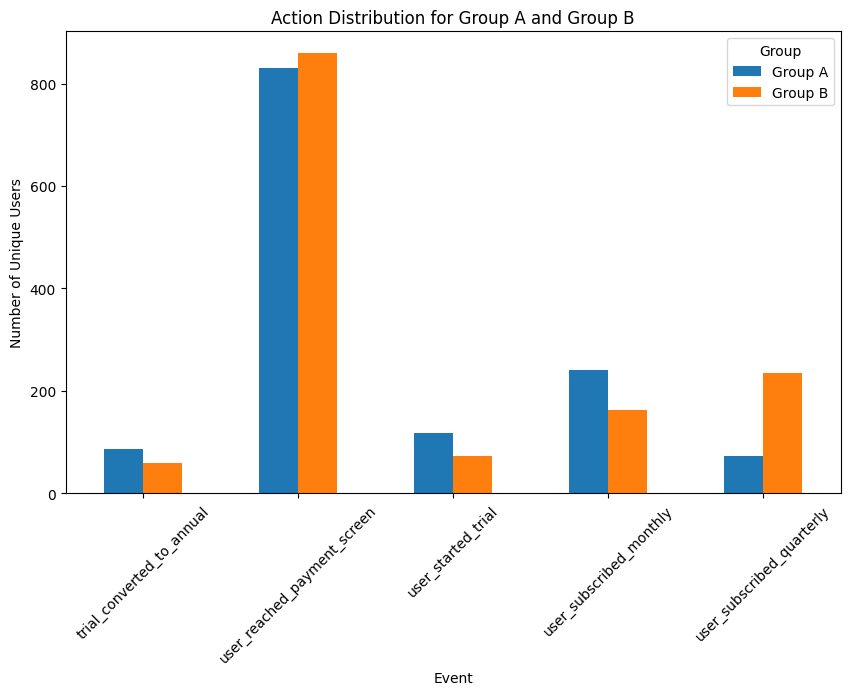

In [6]:

df_histogram = pd.DataFrame(
    {
        "Event": action_distribution_A.index,
        "Group A": action_distribution_A["user_id"],
        "Group B": action_distribution_B["user_id"],
    }
)

# action distribution histogram
df_histogram.plot(kind="bar", x="Event", y=["Group A", "Group B"], figsize=(10, 6))
plt.title("Action Distribution for Group A and Group B")
plt.xlabel("Event")
plt.ylabel("Number of Unique Users")
plt.xticks(rotation=45)
plt.legend(title="Group")
plt.show()

In [7]:
subscription_events = [
    "trial_converted_to_annual",
    "user_subscribed_monthly",
    "user_subscribed_quarterly",
]

# subscription distribution for Group A
subscription_distribution_A = (
    df[(df["group"] == "A") & (df["event"].isin(subscription_events))]
    .groupby("event")
    .nunique()
)
print(subscription_distribution_A)

# subscription distribution for Group B
subscription_distribution_B = (
    df[(df["group"] == "B") & (df["event"].isin(subscription_events))]
    .groupby("event")
    .nunique()
)
print(subscription_distribution_B)

                           user_id  group  revenue
event                                             
trial_converted_to_annual       87      1        1
user_subscribed_monthly        241      1        1
user_subscribed_quarterly       72      1        1
                           user_id  group  revenue
event                                             
trial_converted_to_annual       59      1        1
user_subscribed_monthly        163      1        1
user_subscribed_quarterly      234      1        1


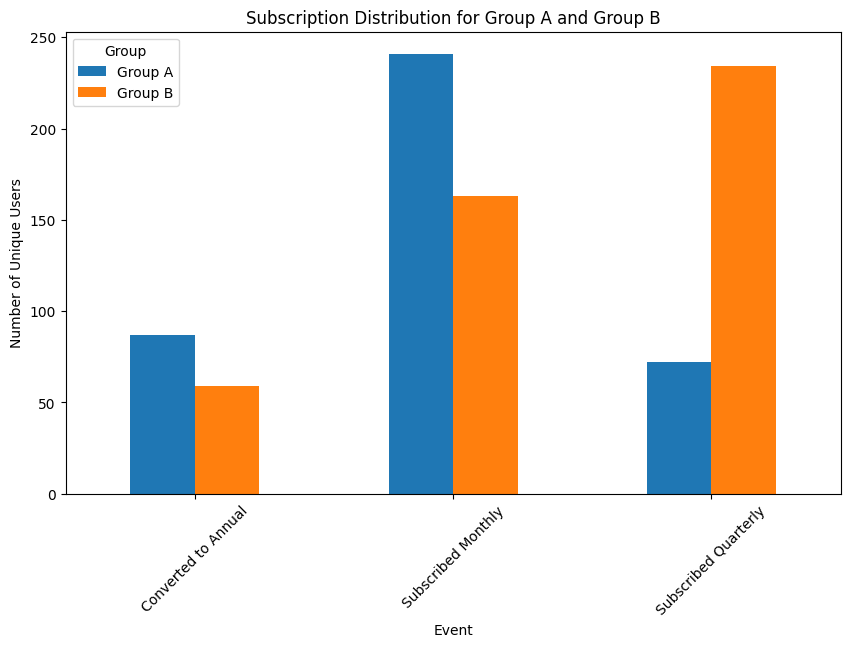

In [8]:
df_subscription_histogram = pd.DataFrame(
    {
        "Event": subscription_distribution_A.index,
        "Group A": subscription_distribution_A["user_id"],
        "Group B": subscription_distribution_B["user_id"],
    }
)

# subscription distribution histogram
event_labels = ["Converted to Annual", "Subscribed Monthly", "Subscribed Quarterly"]
ax = df_subscription_histogram.plot(
    kind="bar", x="Event", y=["Group A", "Group B"], figsize=(10, 6)
)
ax.set_title("Subscription Distribution for Group A and Group B")
ax.set_xlabel("Event")
ax.set_ylabel("Number of Unique Users")
ax.set_xticklabels(event_labels, rotation=45)
plt.legend(title="Group")
plt.show()

In [9]:
# revenue distribution by subscription event
revenue_distribution_A = (
    df[(df["group"] == "A") & (df["event"].isin(subscription_events))]
    .groupby("event")["revenue"]
    .sum()
)

revenue_distribution_B = (
    df[(df["group"] == "B") & (df["event"].isin(subscription_events))]
    .groupby("event")["revenue"]
    .sum()
)
print(revenue_distribution_A)
print(revenue_distribution_B)

event
trial_converted_to_annual    104400
user_subscribed_monthly       72300
user_subscribed_quarterly     36000
Name: revenue, dtype: int64
event
trial_converted_to_annual     70800
user_subscribed_monthly       48900
user_subscribed_quarterly    117000
Name: revenue, dtype: int64


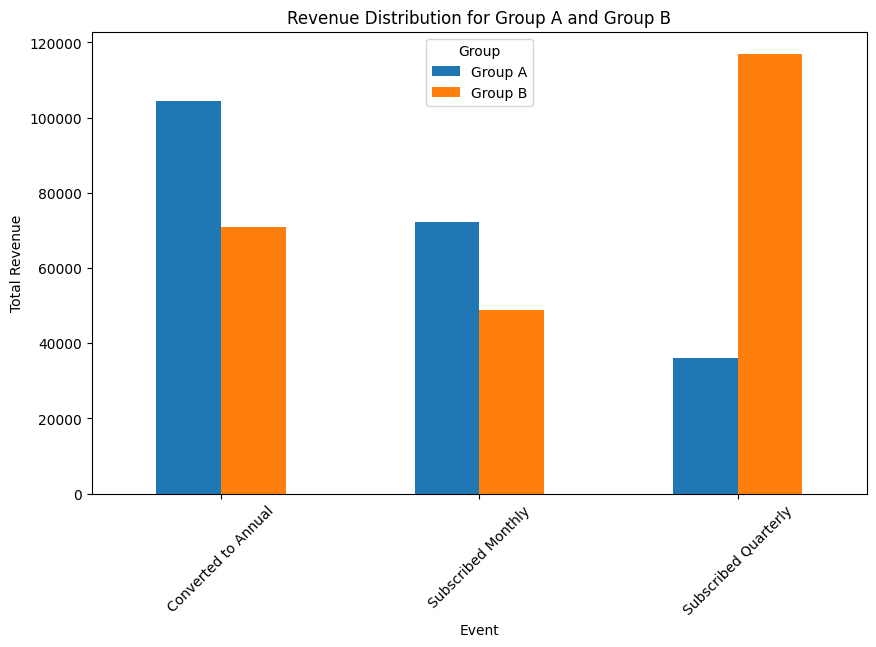

In [10]:
df_revenue_histogram = pd.DataFrame(
    {
        "Event": revenue_distribution_A.index,
        "Group A": revenue_distribution_A.values,
        "Group B": revenue_distribution_B.reindex(
            revenue_distribution_A.index, fill_value=0
        ).values,
    }
)

# revenue distribution histogram
ax = df_revenue_histogram.plot(
    kind="bar", x="Event", y=["Group A", "Group B"], figsize=(10, 6)
)
ax.set_title("Revenue Distribution for Group A and Group B")
ax.set_xlabel("Event")
ax.set_ylabel("Total Revenue")
ax.set_xticklabels(event_labels, rotation=45)
plt.legend(title="Group")
plt.show()

In [11]:
# retention revenue per person for two years
df_retention = pd.read_csv("subscription_retention_and_prices.csv")
sum_monthly_retention_revenue = int(sum(df_retention["Monthly Retention"] * 300))
sum_quarterly_retention_revenue = int(
    sum(df_retention["Quarterly Retention"] * 500) / 3
)
sum_annual_retention_revenue = int(sum(df_retention["Annual Retention"] * 1200) / 12)
print(
    f"Monthly revenue retention sum: {sum_monthly_retention_revenue}, \nQuarterly revenue retention sum: {sum_quarterly_retention_revenue}, \nAnnual revenue retention sum: {sum_annual_retention_revenue}"
)

Monthly revenue retention sum: 2760, 
Quarterly revenue retention sum: 1570, 
Annual revenue retention sum: 1440


In [12]:
# metrics
subscribed_users_per_group = (
    df[df["event"].isin(subscription_events)].groupby("group")["user_id"].nunique()
)

total_revenue_per_group = df.groupby("group")["revenue"].sum()

conversion_rate_per_group = (subscribed_users_per_group / total_users_per_group) * 100

rpu_per_group = total_revenue_per_group / total_users_per_group

revenue_per_subscribed_user = round(
    total_revenue_per_group / subscribed_users_per_group, 3
)


metrics_df = pd.DataFrame(
    {
        "Total Users": total_users_per_group,
        "Users Reached Payment": users_reached_payment_per_group,
        "Subscribed Users": subscribed_users_per_group,
        "Total Revenue": total_revenue_per_group,
        "Conversion Rate (%)": conversion_rate_per_group,
        "Revenue Per User (RPU)": rpu_per_group,
        "Revenue Per Subscriber": revenue_per_subscribed_user,
    }
)

print(metrics_df)

       Total Users  Users Reached Payment  Subscribed Users  Total Revenue  \
group                                                                        
A             1000                    831               400         212700   
B             1000                    859               456         236700   

       Conversion Rate (%)  Revenue Per User (RPU)  Revenue Per Subscriber  
group                                                                       
A                     40.0                   212.7                 531.750  
B                     45.6                   236.7                 519.079  


In [13]:

# normality tests
shapiro_test_A = stats.shapiro(df[df["group"] == "A"]["revenue"].dropna())
shapiro_test_B = stats.shapiro(df[df["group"] == "B"]["revenue"].dropna())

print(shapiro_test_A, shapiro_test_A)

# Levene's test for equal variances
levene_test = stats.levene(
    df[df["group"] == "A"]["revenue"].dropna(),
    df[df["group"] == "B"]["revenue"].dropna(),
)
print("Levene Test p-value:", round(levene_test.pvalue, 3))

ShapiroResult(statistic=np.float64(0.4066436053647665), pvalue=np.float64(3.2666762574623166e-66)) ShapiroResult(statistic=np.float64(0.4066436053647665), pvalue=np.float64(3.2666762574623166e-66))
Levene Test p-value: 0.226


In [14]:
# significance tests
if shapiro_test_A.pvalue > 0.05 and shapiro_test_B.pvalue > 0.05:
    if levene_test.pvalue > 0.05:
        print("T-Test with equal variances")
        t_test = stats.ttest_ind(
            df[df["group"] == "A"]["revenue"].dropna(),
            df[df["group"] == "B"]["revenue"].dropna(),
            equal_var=True,
        )
    else:
        print("T-Test with unequal variances")
        t_test = stats.ttest_ind(
            df[df["group"] == "A"]["revenue"].dropna(),
            df[df["group"] == "B"]["revenue"].dropna(),
            equal_var=False,
        )
else:
    print("Use Mann-Whitney U test")
    mannwhitney_test = stats.mannwhitneyu(
        df[df["group"] == "A"]["revenue"].dropna(),
        df[df["group"] == "B"]["revenue"].dropna(),
    )
    print("Mann-Whitney U Test Result p-value:", round(mannwhitney_test.pvalue, 3))

result_pvalue = (
    round(t_test.pvalue, 3)
    if "t_test" in locals()
    else round(mannwhitney_test.pvalue, 3)
)
print("Result for revenue:", result_pvalue)

Use Mann-Whitney U test
Mann-Whitney U Test Result p-value: 0.022
Result for revenue: 0.022


In [15]:
# central limit theorem for conversion rates
n_A = total_users_per_group["A"]
x_A = subscribed_users_per_group["A"]
n_B = total_users_per_group["B"]
x_B = subscribed_users_per_group["B"]

p1 = x_A / n_A
p2 = x_B / n_B
p_combined = (x_A + x_B) / (n_A + n_B)
SE = (p_combined * (1 - p_combined) * (1 / n_A + 1 / n_B)) ** 0.5
z_score = (p1 - p2) / SE

p_value_two_tailed = stats.norm.sf(abs(z_score)) * 2
p_value_one_tailed = stats.norm.sf(z_score)

print(
    "Conversion for A group =",
    round(p1, 3),
    "\nConversion for B group =",
    round(p2, 3),
    "\nZ-score =",
    round(z_score, 3),
    "\nP-value for two-tailed test =",
    round(p_value_two_tailed, 3),
    "\nP-value for one-tailed test (pB > pA) =",
    round(p_value_one_tailed, 3),
)

Conversion for A group = 0.4 
Conversion for B group = 0.456 
Z-score = -2.531 
P-value for two-tailed test = 0.011 
P-value for one-tailed test (pB > pA) = 0.994


In [16]:
# Bayesian approach
alpha_prior, beta_prior = 1, 1

alpha_A = x_A + alpha_prior
beta_A = n_A - x_A + beta_prior
alpha_B = x_B + alpha_prior
beta_B = n_B - x_B + beta_prior

np.random.seed(42)
samples_A = beta(alpha_A, beta_A).rvs(10000)
samples_B = beta(alpha_B, beta_B).rvs(10000)

prob_B_greater_A = np.mean(samples_B > samples_A)
diff = samples_B - samples_A

print("prob_B_greater_A =", prob_B_greater_A)

prob_B_greater_A = 0.9949


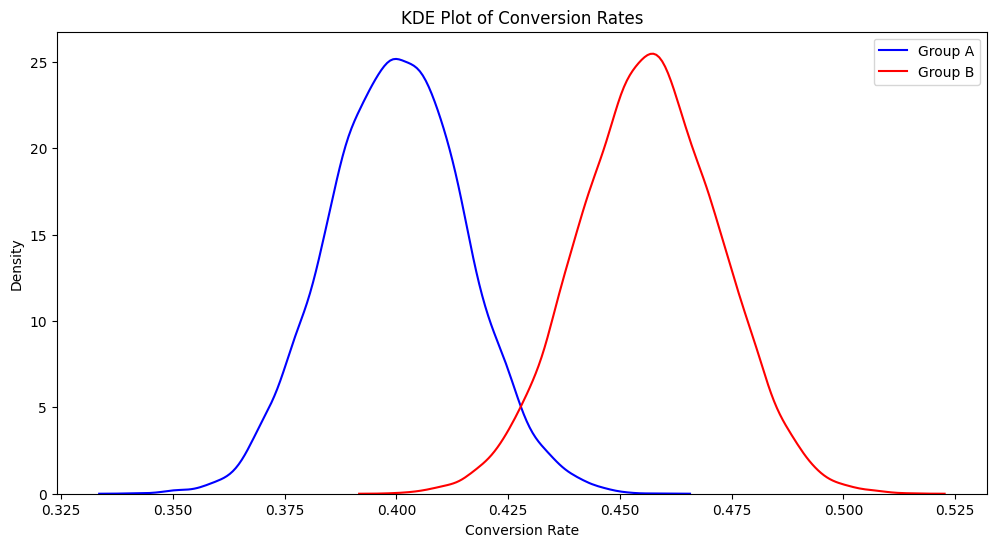

In [17]:
# KDE plot of conversion rates
plt.figure(figsize=(12, 6))
sns.kdeplot(samples_A, color="blue", label="Group A")
sns.kdeplot(samples_B, color="red", label="Group B")
plt.title("KDE Plot of Conversion Rates")
plt.xlabel("Conversion Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

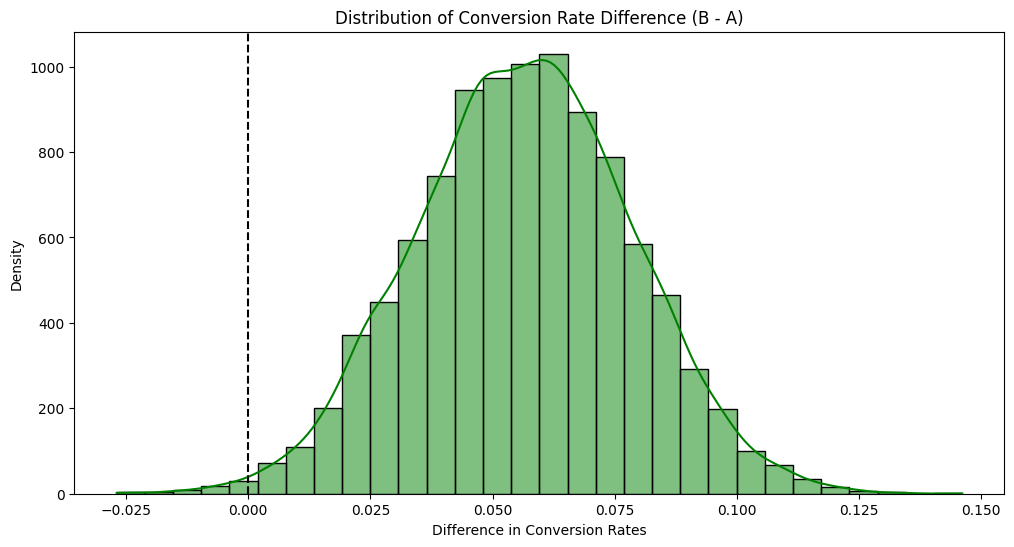

In [18]:
# distribution of conversion rate difference (B - A)
plt.figure(figsize=(12, 6))
sns.histplot(diff, kde=True, color="green", bins=30)
plt.axvline(x=0, color="black", linestyle="--")
plt.title("Distribution of Conversion Rate Difference (B - A)")
plt.xlabel("Difference in Conversion Rates")
plt.ylabel("Density")
plt.show()

In [19]:
# 95% confidence interval for conversion difference (B-A) using bootstrap testing

n_bootstraps = 10000
n_users = 1000

bootstrap_diffs = np.empty(n_bootstraps)

for i in range(n_bootstraps):
    # resample with replacement for both groups
    sample_A = np.random.choice(
        [0, 1],
        size=n_users,
        p=[
            1 - conversion_rate_per_group["A"] / 100,
            conversion_rate_per_group["A"] / 100,
        ],
    )
    sample_B = np.random.choice(
        [0, 1],
        size=n_users,
        p=[
            1 - conversion_rate_per_group["B"] / 100,
            conversion_rate_per_group["B"] / 100,
        ],
    )

    # conversion rates for the bootstrap sample
    p_A_boot = np.mean(sample_A)
    p_B_boot = np.mean(sample_B)

    bootstrap_diffs[i] = p_B_boot - p_A_boot

mean_diff = np.mean(bootstrap_diffs)

lower_bound = np.percentile(bootstrap_diffs, 2.5)
upper_bound = np.percentile(bootstrap_diffs, 97.5)

print(
    f"95% confidence interval for conversion difference (B-A): {round(lower_bound, 3)}, {round(upper_bound, 3)}. Mean: {mean_diff}"
)


95% confidence interval for conversion difference (B-A): 0.013, 0.099. Mean: 0.0561814
